In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
new_df=df.sample(30000,random_state=6)

In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0


In [7]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    18999
1    11001
Name: count, dtype: int64
is_duplicate
0    63.33
1    36.67
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

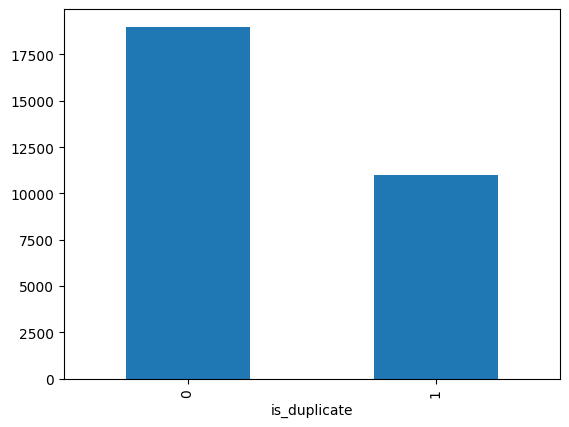

In [8]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55507
Number of questions getting repeated 3383


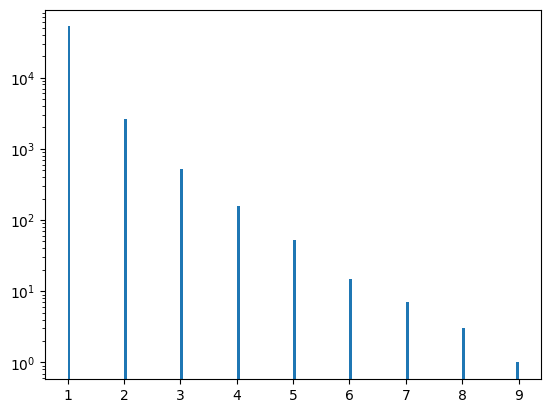

In [10]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [11]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0


In [12]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [13]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34


In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7


In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [16]:

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3


In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [18]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5,19
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3,10
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2,31
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6,22
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3,15


In [20]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5,19,0.26
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3,10,0.30
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2,31,0.06
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6,22,0.27
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3,15,0.20


In [21]:
 ques_df = new_df[['question1','question2']]
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
37534,0,41,50,8,11,5,19,0.26
309101,0,27,42,4,6,3,10,0.30
397022,0,52,142,9,26,2,31,0.06
322007,0,53,79,10,14,6,22,0.27
340381,0,41,34,8,7,3,15,0.20


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
print(temp_df.shape)

final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()




(30000, 6000)
(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
37534,0,41,50,8,11,5,19,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
309101,0,27,42,4,6,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
397022,0,52,142,9,26,2,31,0.06,0,0,...,0,0,1,0,2,0,0,0,0,0
322007,0,53,79,10,14,6,22,0.27,0,0,...,0,0,0,0,1,0,0,0,0,0
340381,0,41,34,8,7,3,15,0.20,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7716666666666666

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7611666666666667